**Notebook exemplifying outlier detection framework**

Structure of this workbook:
1. Setting-up the dependencies
2. Filter the databases for sectors/ set of activities that we want to compare
3. Choosing the methods we want to use in the comparison
4. Generate tables that hold total scores and input contributions to scores
5. Plotting the scores in a couple of ways characterized but also not characterized 

1. Dependencies - Imports and brightway setup

In [3]:
from functions_v2 import*

import brightway2 as bw
import bw2data as bd
import bw2analyzer as ba

#reduce?
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Setting up the brightway dependencies in terms of setting the project and loading the necessary databases (ecoinvent original, premise based ecoinvent)*

In [4]:
bd.projects.set_current("premise-validation-try1")
bw.bw2setup()

bio3=bw.Database('biosphere3')
ei39=bw.Database('ecoinvent 3.9.1 cutoff')
ei39SSP2=bw.Database('ei_cutoff_3.9_image_SSP2-RCP19_2050 2024-06-27')

Biosphere database already present!!! No setup is needed


2. Database Filters - Yaml filters and activties list

*load in file path to file and its name (.yaml) which contains defined sector filters*

In [3]:
print(os.getcwd())

c:\Users\fried\premise_validation\dev


In [4]:
fp_yaml='cement_concrete.yaml'

set_cement_concrete=generate_sets_from_filters(fp_yaml, database=ei39SSP2)


*generate_sets_from_filters function returns a dictionary of sectors as keys according to the .yaml file. Using list comprehension we generate a list of activities for one ore more of the sectors e.g. 'Cement'*

In [5]:
#List comprehension of yaml filtered sets to create activity list.
sector_cement=[x for x in set_cement_concrete['Cement']]

*Need to select the items from the list by splicing [:]. To reduce runtime, only 4 activities of the sector cement are selected. We could also further filter the secotr by a certain product type for instance Portland cement.*

In [6]:
#Activity list
sector_cement_small=sector_cement[:4]
sector_cement_small

['cement production, CEM II/A-S' (kilogram, ZA, None),
 'cement production, Portland' (kilogram, Europe without Switzerland, None),
 'cement production, CP V RS' (kilogram, BR, None),
 'cement production, CEM II/B' (kilogram, Europe without Switzerland, None)]

3. Method - Get Methods, call bw.Method and store as variables in method list as well as in method dictionary.
(!This step needs to be polished: just one dictionary which is well structued is enough)

*Define method variables using the function find_and_create_method by defining certain method filters (or do it by hand)*

In [39]:
finder=MethodFinder()

In [40]:
finder.find_and_create_method(criteria=['IPCC', '2013', 'GWP100'], exclude=['no LT'])

{'method_1': {'object': Brightway2 Method: IPCC 2013: climate change: global warming potential (GWP100),
  'method name': ('IPCC 2013',
   'climate change',
   'global warming potential (GWP100)'),
  'short name': 'global warming potential (GWP100)',
  'unit': 'kg CO2-Eq'}}

In [41]:
finder.find_and_create_method(criteria=['EN15804','Cumulative', 'non-renewable' ])

{'method_2': {'object': Brightway2 Method: EN15804: inventory indicators ISO21930: Cumulative Energy Demand - non-renewable energy resources,
  'method name': ('EN15804',
   'inventory indicators ISO21930',
   'Cumulative Energy Demand - non-renewable energy resources'),
  'short name': 'Cumulative Energy Demand - non-renewable energy resources',
  'unit': 'megajoule'}}

In [42]:
finder.find_and_create_method(criteria=['land occupation','selected'])

{'method_3': {'object': Brightway2 Method: selected LCI results: resource: land occupation,
  'method name': ('selected LCI results', 'resource', 'land occupation'),
  'short name': 'land occupation',
  'unit': 'square meter-year'}}

In [43]:
finder.find_and_create_method(criteria=['EN15804','fresh water'])

{'method_4': {'object': Brightway2 Method: EN15804: inventory indicators ISO21930: use of net fresh water,
  'method name': ('EN15804',
   'inventory indicators ISO21930',
   'use of net fresh water'),
  'short name': 'use of net fresh water',
  'unit': 'cubic meter'}}

In [44]:
method_dict=finder.get_all_methods()
method_dict

{'method_1': {'object': Brightway2 Method: IPCC 2013: climate change: global warming potential (GWP100),
  'method name': ('IPCC 2013',
   'climate change',
   'global warming potential (GWP100)'),
  'short name': 'global warming potential (GWP100)',
  'unit': 'kg CO2-Eq'},
 'method_2': {'object': Brightway2 Method: EN15804: inventory indicators ISO21930: Cumulative Energy Demand - non-renewable energy resources,
  'method name': ('EN15804',
   'inventory indicators ISO21930',
   'Cumulative Energy Demand - non-renewable energy resources'),
  'short name': 'Cumulative Energy Demand - non-renewable energy resources',
  'unit': 'megajoule'},
 'method_3': {'object': Brightway2 Method: selected LCI results: resource: land occupation,
  'method name': ('selected LCI results', 'resource', 'land occupation'),
  'short name': 'land occupation',
  'unit': 'square meter-year'},
 'method_4': {'object': Brightway2 Method: EN15804: inventory indicators ISO21930: use of net fresh water,
  'method na

5. Sector Scores Dataframes - Total Scores, Input Contribution Tables to Dataframe stored in list, save to excel too

*With the defined activity list and method list (or dict) we can now generate the dataframes containg the total score and input contributions from which we generate the plots. (Fyi: This step can take a while)*

In [19]:
cement_sector_compare=compare_activities_multiple_methods(
    activities_list=sector_cement_small, 
    methods=method_dict,  
    identifier='cement',
    output_format='pandas',
    mode='absolute')

Omitting activity name common prefix: 'cement production, '
Omitting activity name common prefix: 'cement production, '
Omitting activity name common prefix: 'cement production, '
Omitting activity name common prefix: 'cement production, '


In [20]:
cement_sector_compare

{'cement_global_warming_potential_(gwp100)':      activity     product                   location      unit  \
 0  CEM II/A-S  CEM II/A-S                         ZA  kilogram   
 1    CEM II/B    CEM II/B  Europe without Switzerlan  kilogram   
 2     CP V RS     CP V RS                         BR  kilogram   
 3    Portland    Portland  Europe without Switzerlan  kilogram   
 
                               method method unit     total  direct emissions  \
 0  global warming potential (GWP100)   kg CO2-Eq  0.683900               0.0   
 1  global warming potential (GWP100)   kg CO2-Eq  0.623345               0.0   
 2  global warming potential (GWP100)   kg CO2-Eq  0.703074               0.0   
 3  global warming potential (GWP100)   kg CO2-Eq  0.815993               0.0   
 
    37430: Cement clinkers  \
 0                0.598921   
 1                0.575368   
 2                0.626334   
 3                0.759166   
 
    33: Coke oven products; refined petroleum products; nucl

In [21]:
list(cement_sector_compare.keys())[:] #getting name of the dataframe which holds gwp method scores

['cement_global_warming_potential_(gwp100)',
 'cement_cumulative_energy_demand_-_non-renewable_energy_resources',
 'cement_land_occupation',
 'cement_use_of_net_fresh_water']

*Manipulate the output a little using small_inputs_to_other_column reducing the size of the dataframe by neglecting the inputs that contribute 0.01 or less to the overall score of an activity/dataset*

In [22]:
cement_sector_compare=small_inputs_to_other_column(cement_sector_compare, cutoff = 0.02)
cement_sector_compare

{'cement_global_warming_potential_(gwp100)':      activity     product                   location      unit  \
 3    Portland    Portland  Europe without Switzerlan  kilogram   
 2     CP V RS     CP V RS                         BR  kilogram   
 0  CEM II/A-S  CEM II/A-S                         ZA  kilogram   
 1    CEM II/B    CEM II/B  Europe without Switzerlan  kilogram   
 
                               method method unit     total  \
 3  global warming potential (GWP100)   kg CO2-Eq  0.815993   
 2  global warming potential (GWP100)   kg CO2-Eq  0.703074   
 0  global warming potential (GWP100)   kg CO2-Eq  0.683900   
 1  global warming potential (GWP100)   kg CO2-Eq  0.623345   
 
    37430: Cement clinkers  \
 3                0.759166   
 2                0.626334   
 0                0.598921   
 1                0.575368   
 
    33: Coke oven products; refined petroleum products; nuclear fuel  \
 3                                           0.000000                  
 2    

3. Plotting

3.1. Level 1 dot plots

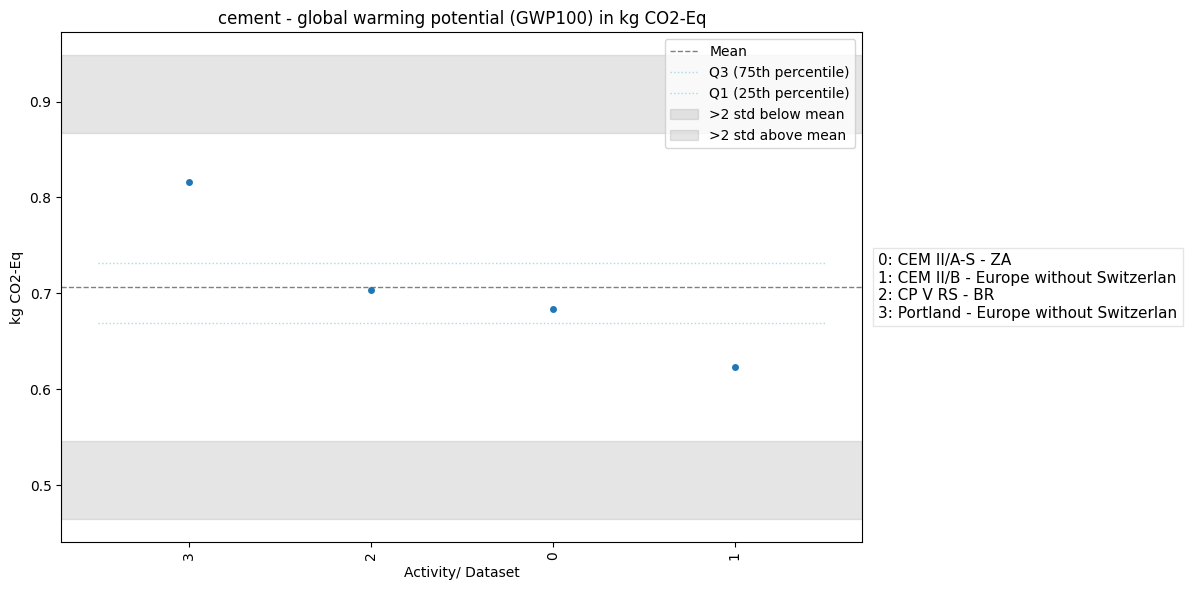

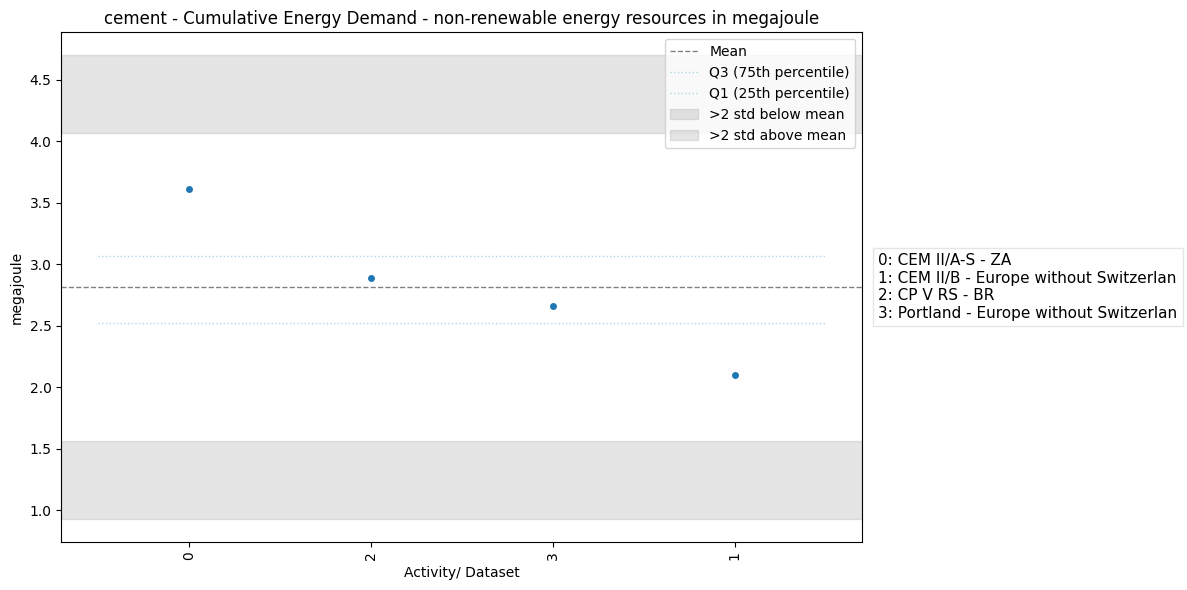

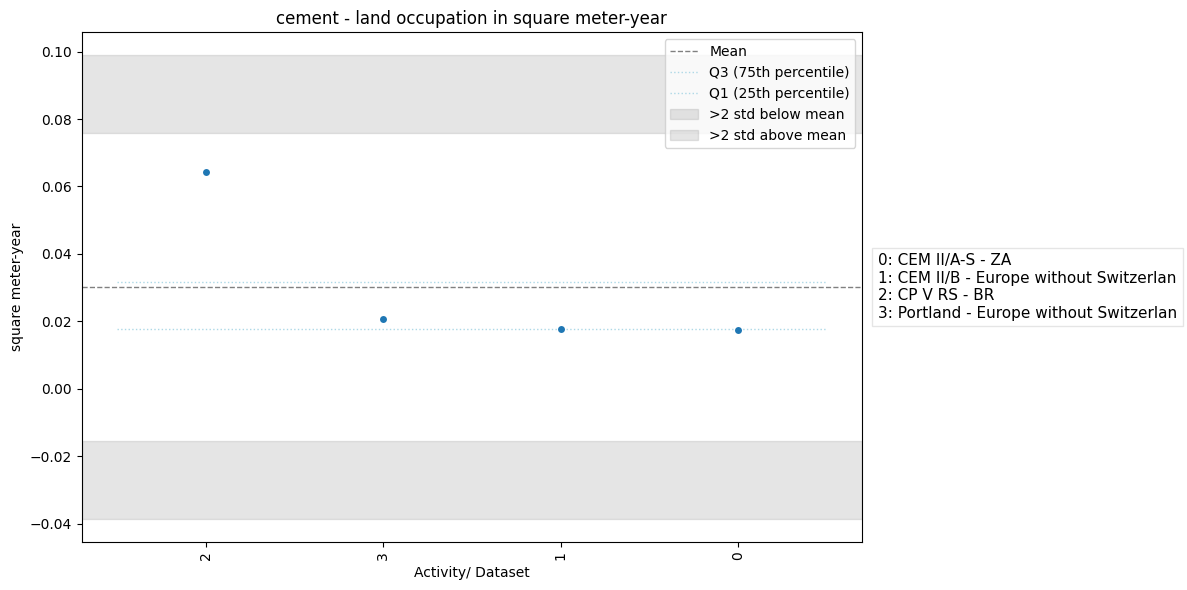

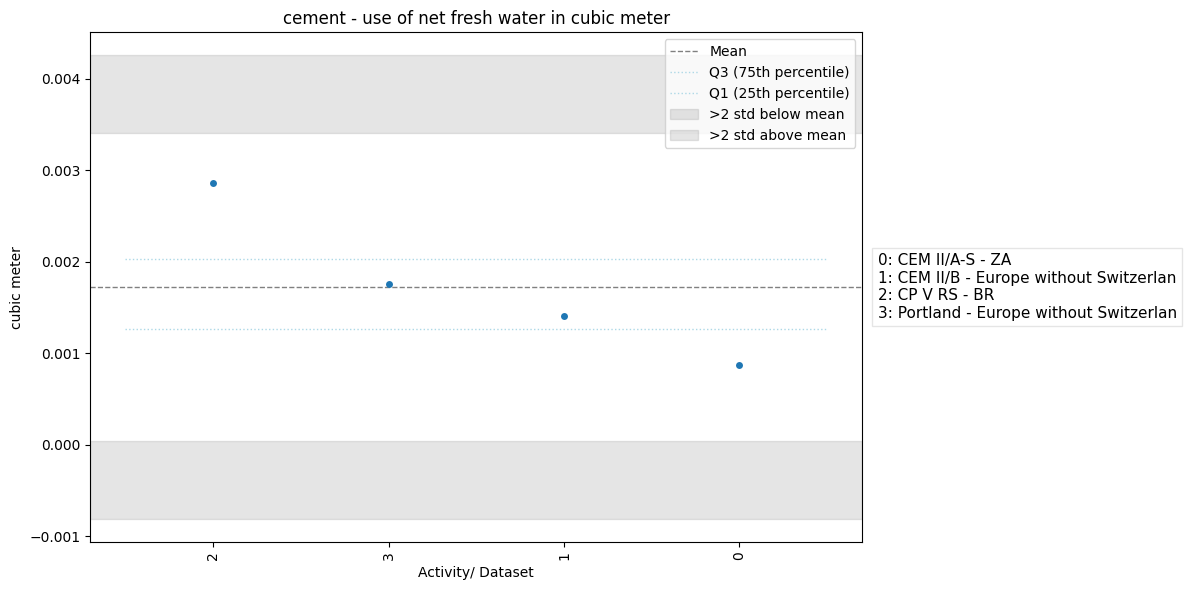

In [23]:
lvl1_plot(cement_sector_compare, 'cement')

3.2. Level 2.1 stacked absolute bar plots

*TBD: Color palette is not so nice (too alike colors are misleading), Y-axis units not showing*

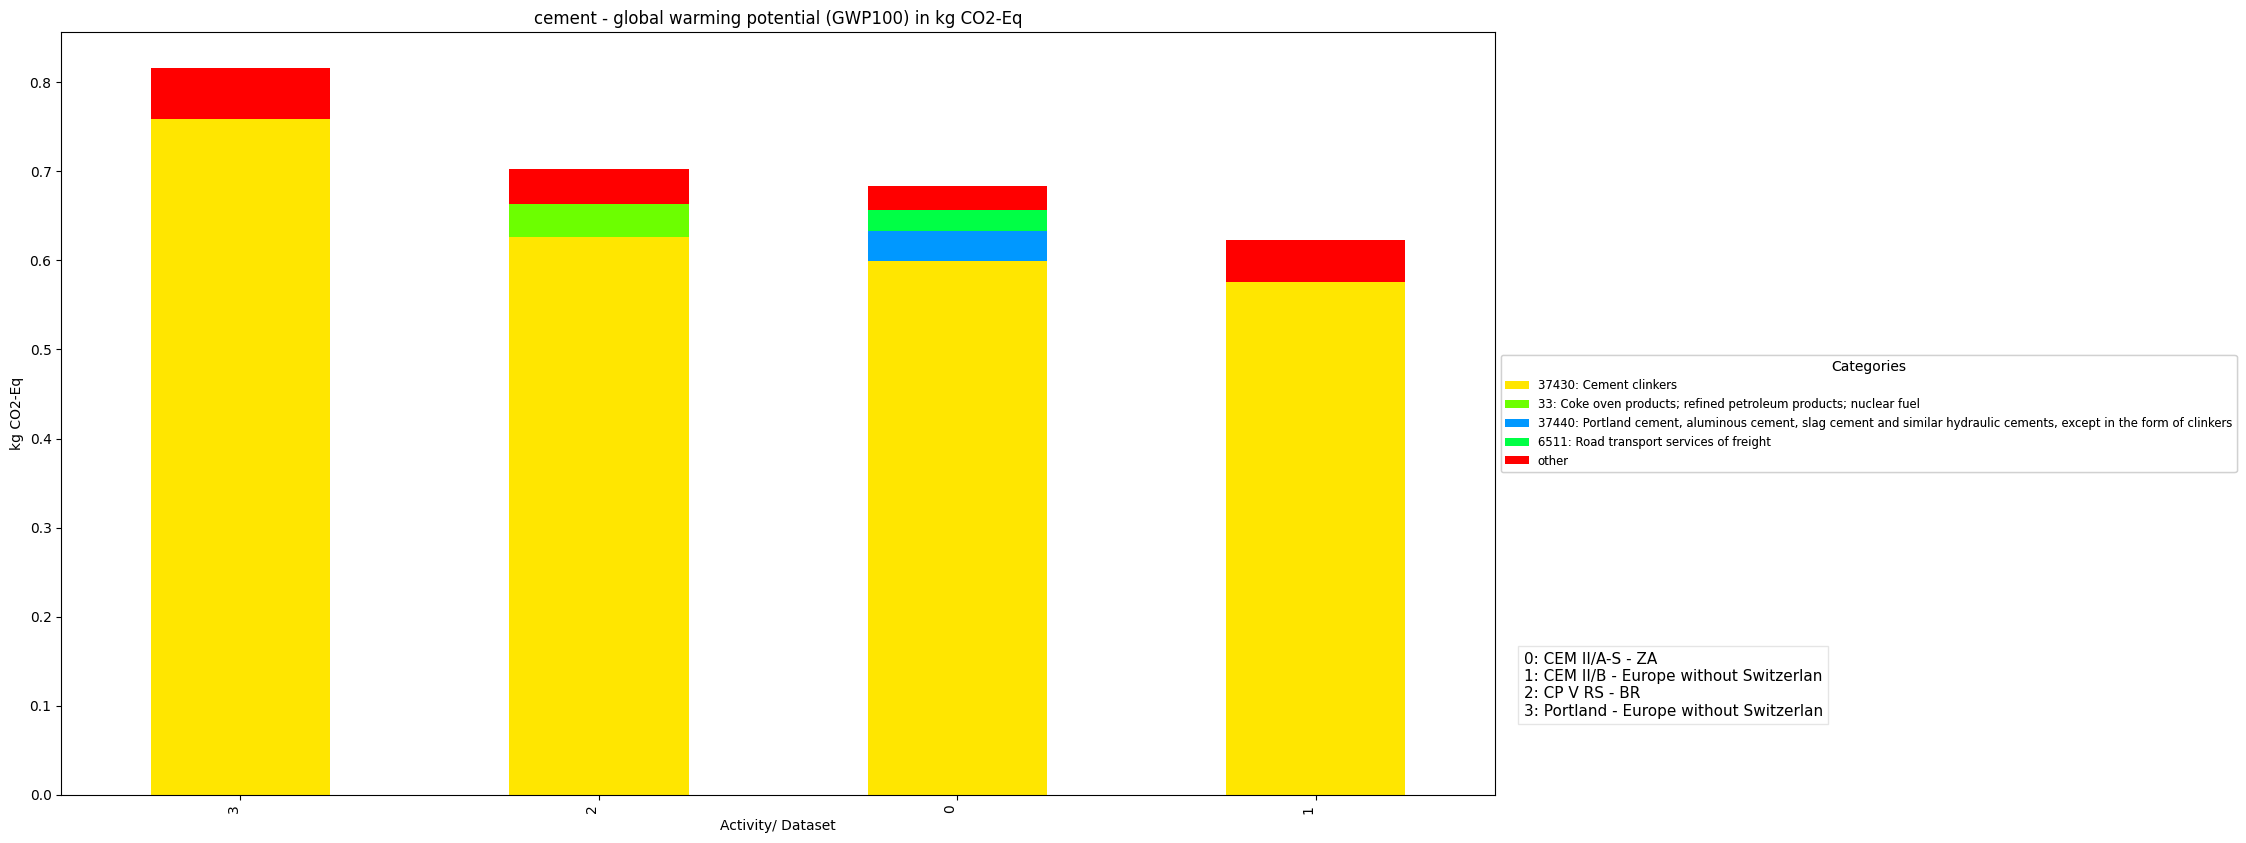

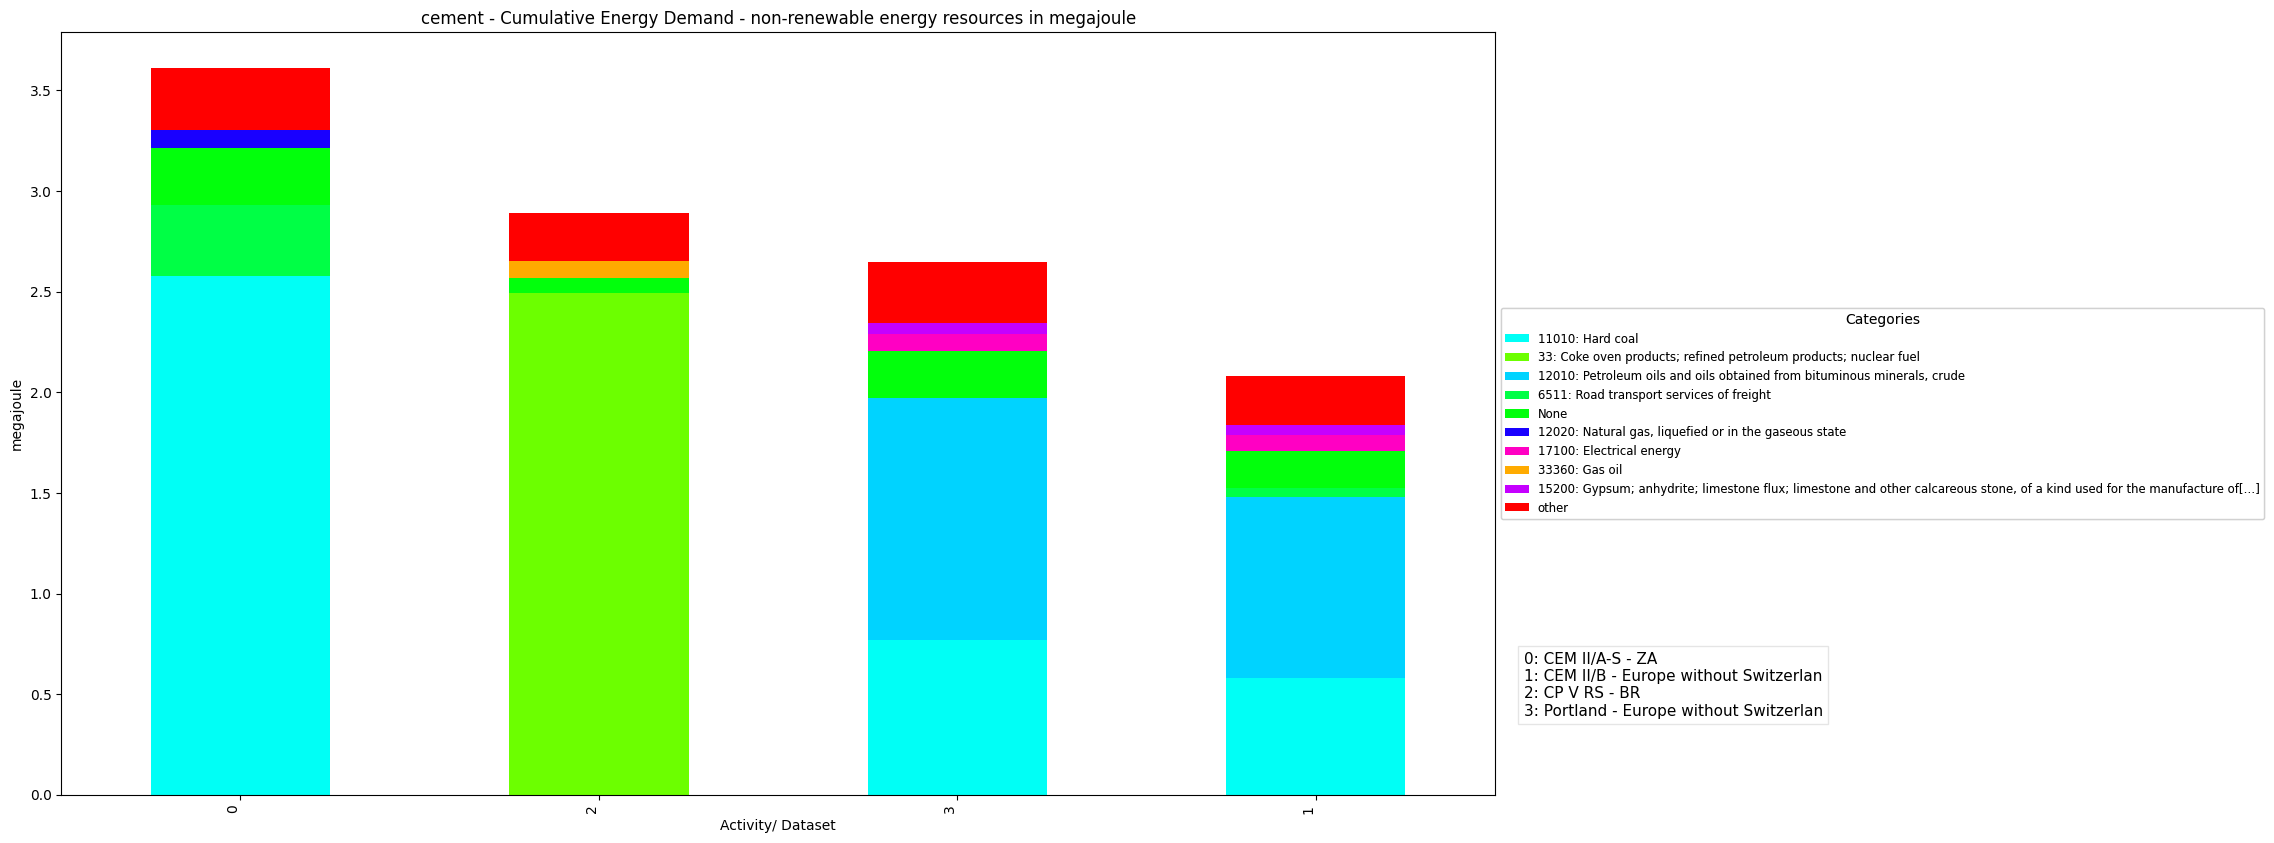

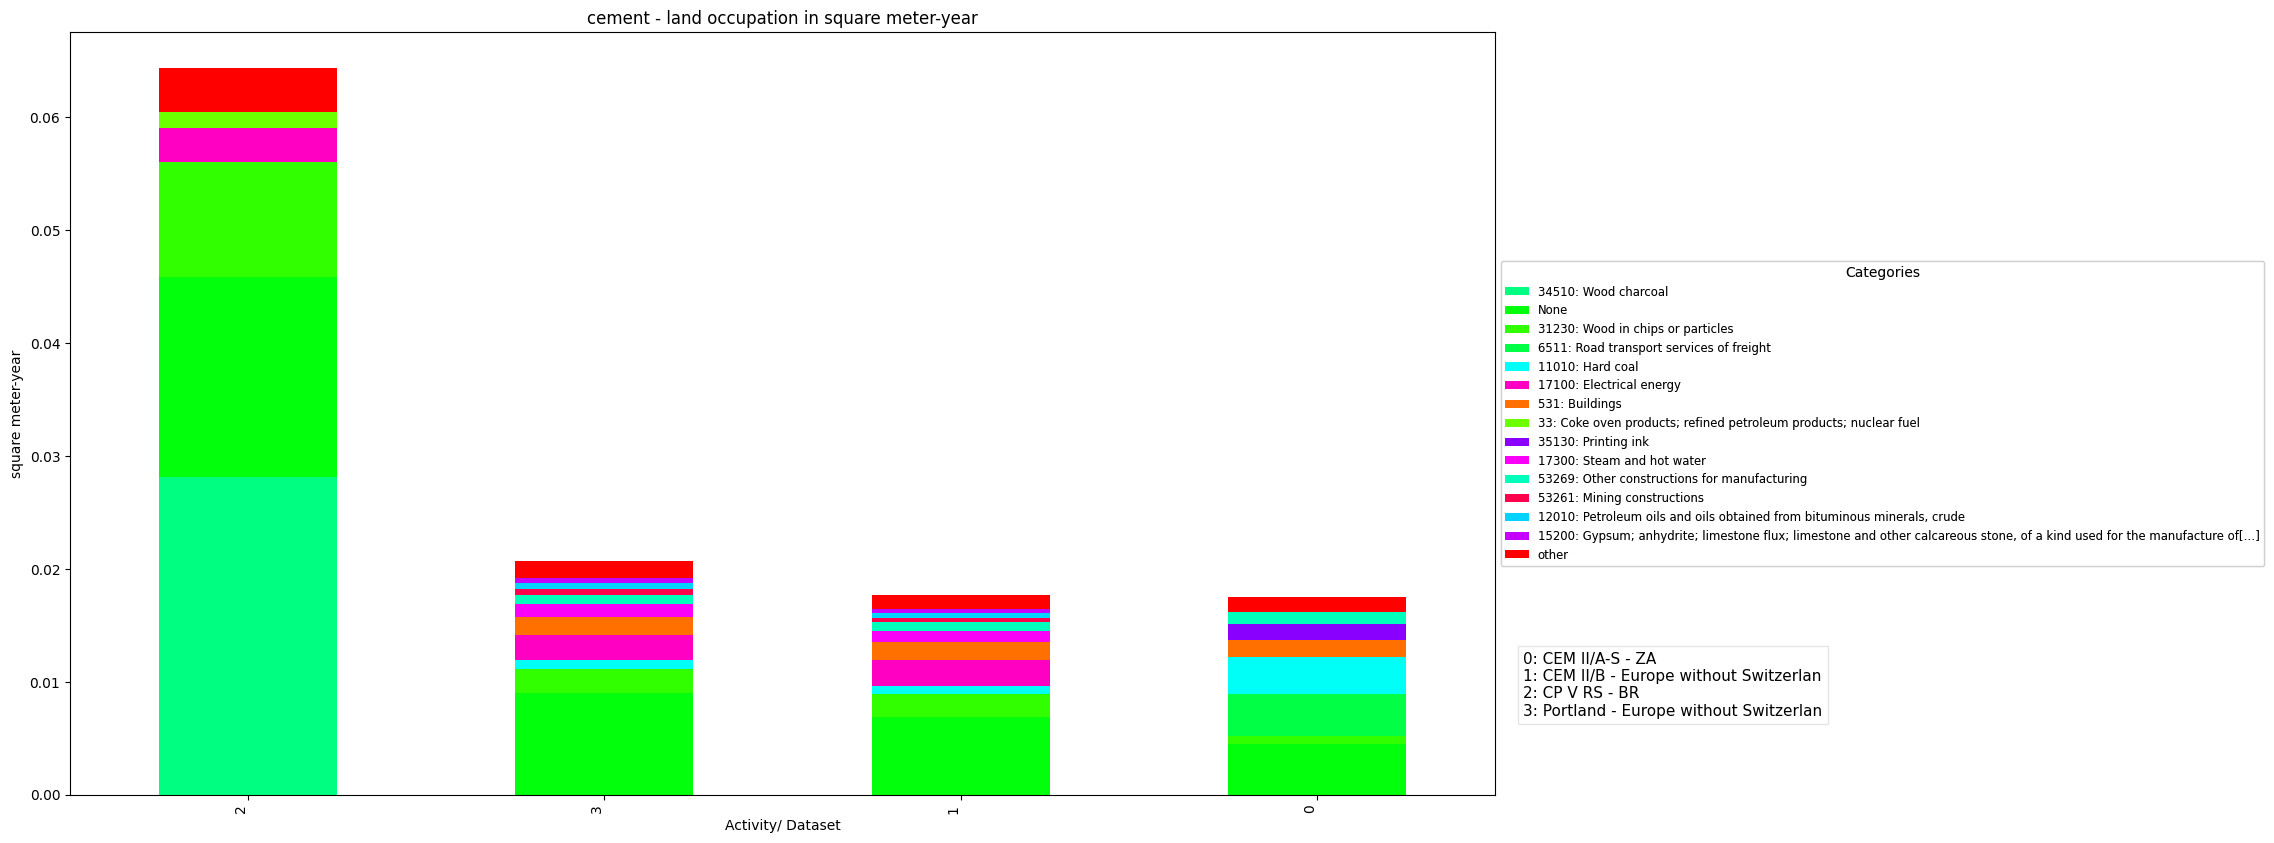

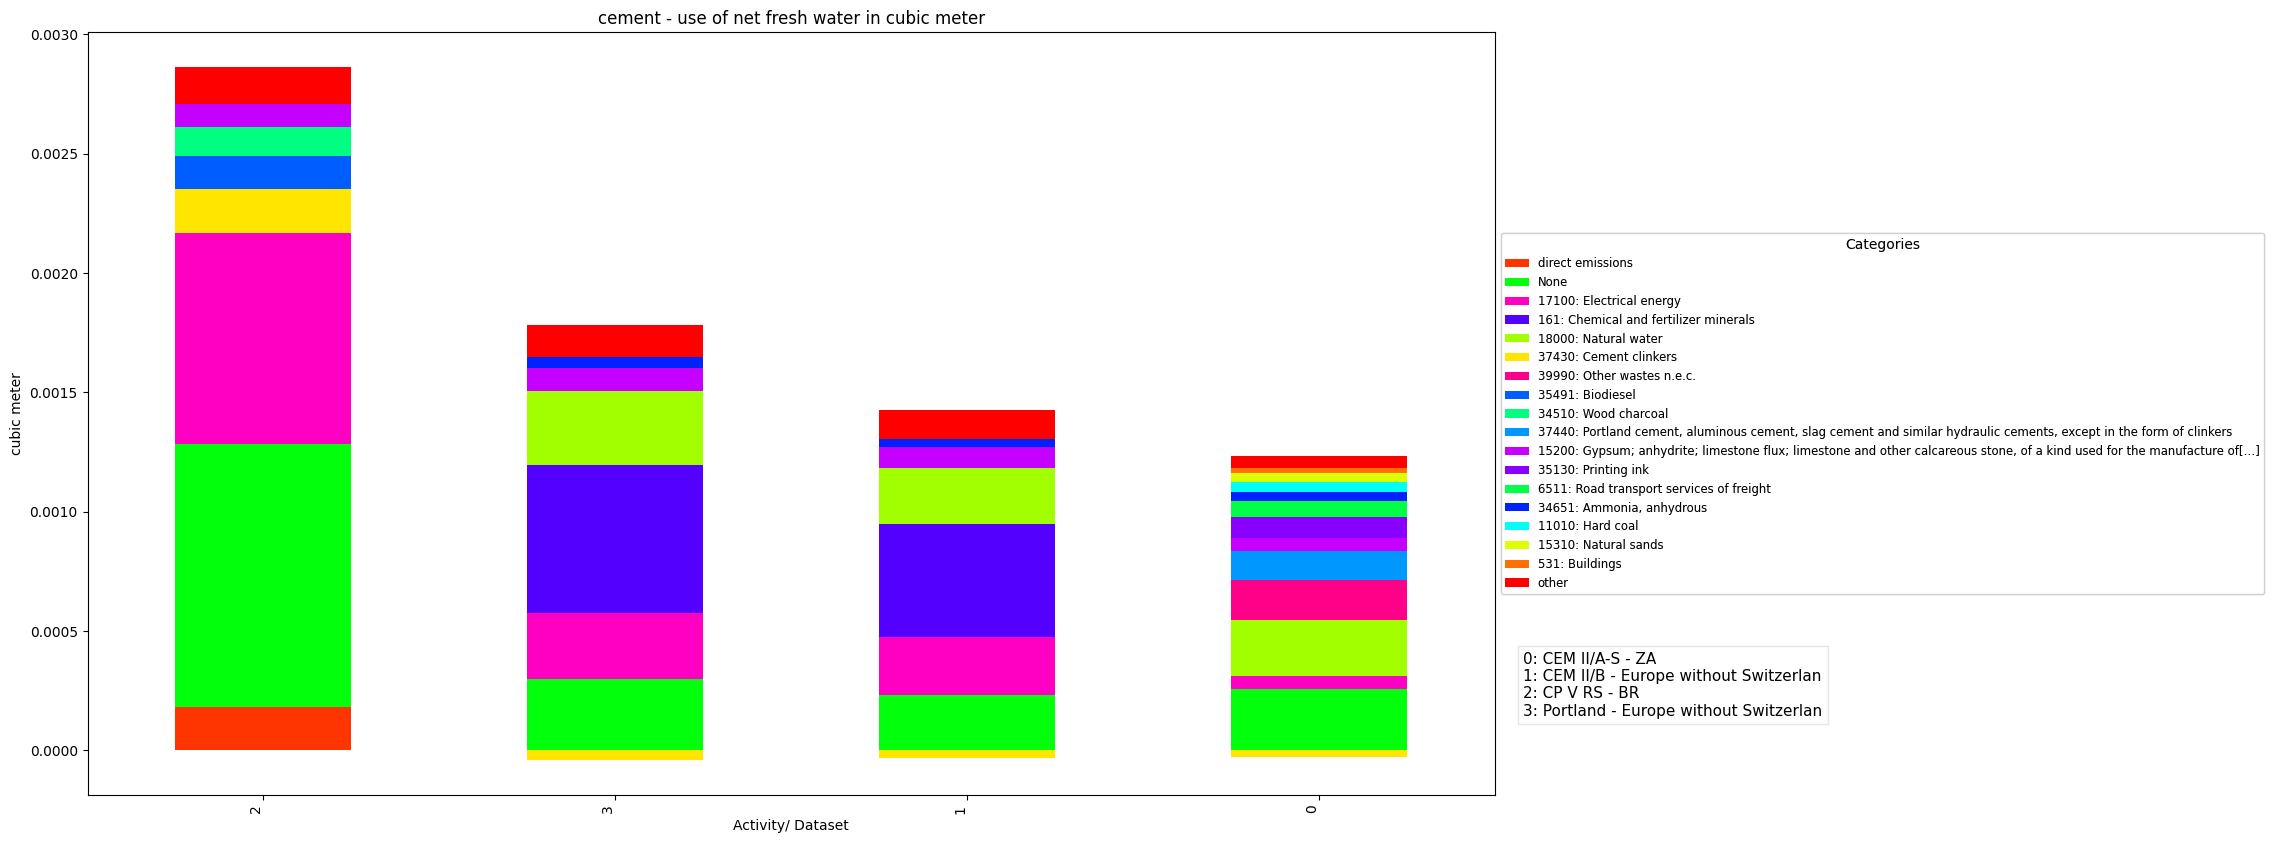

In [24]:
lvl21_plot_stacked_absolute(cement_sector_compare, 'cement')

3.3. Level 2.2 Bar plots of a certain characterized input compared among datasets/ activities

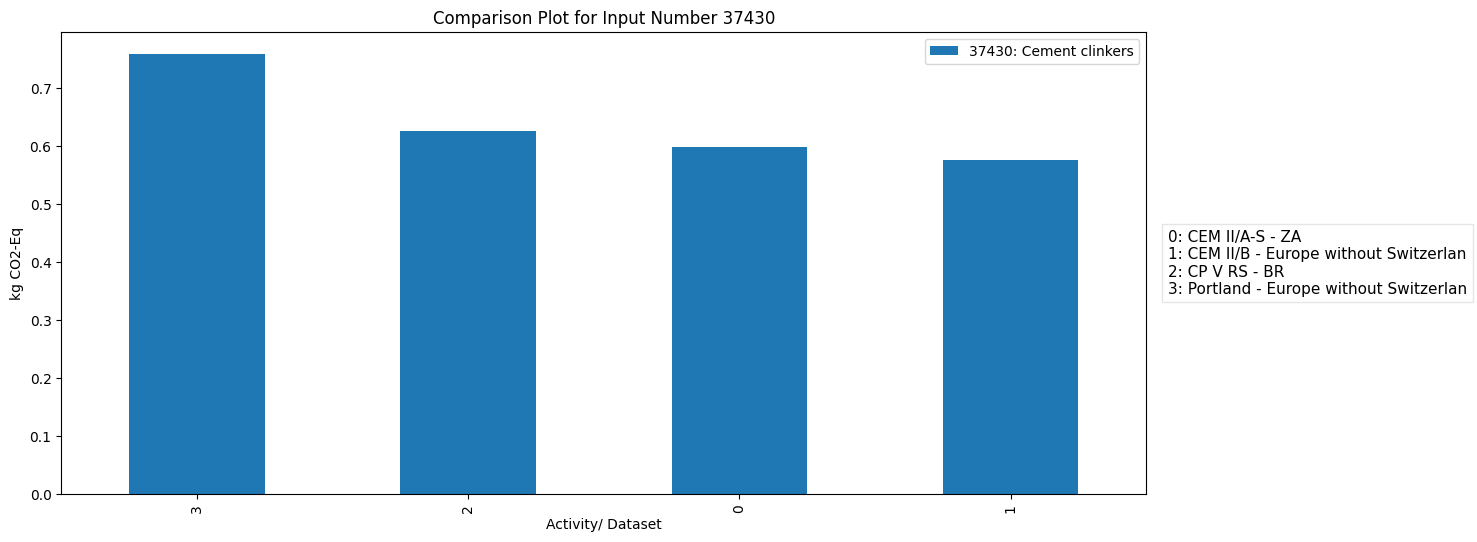

In [31]:
lvl22_plot_input_comparison_with_method(cement_sector_compare, 'cement_global_warming_potential_(gwp100)', '37430')

3.3. Level 2.3 Bar plots of a certain input not characterized

*TBD: Include same legend as in previous graph which shows the name of the input*

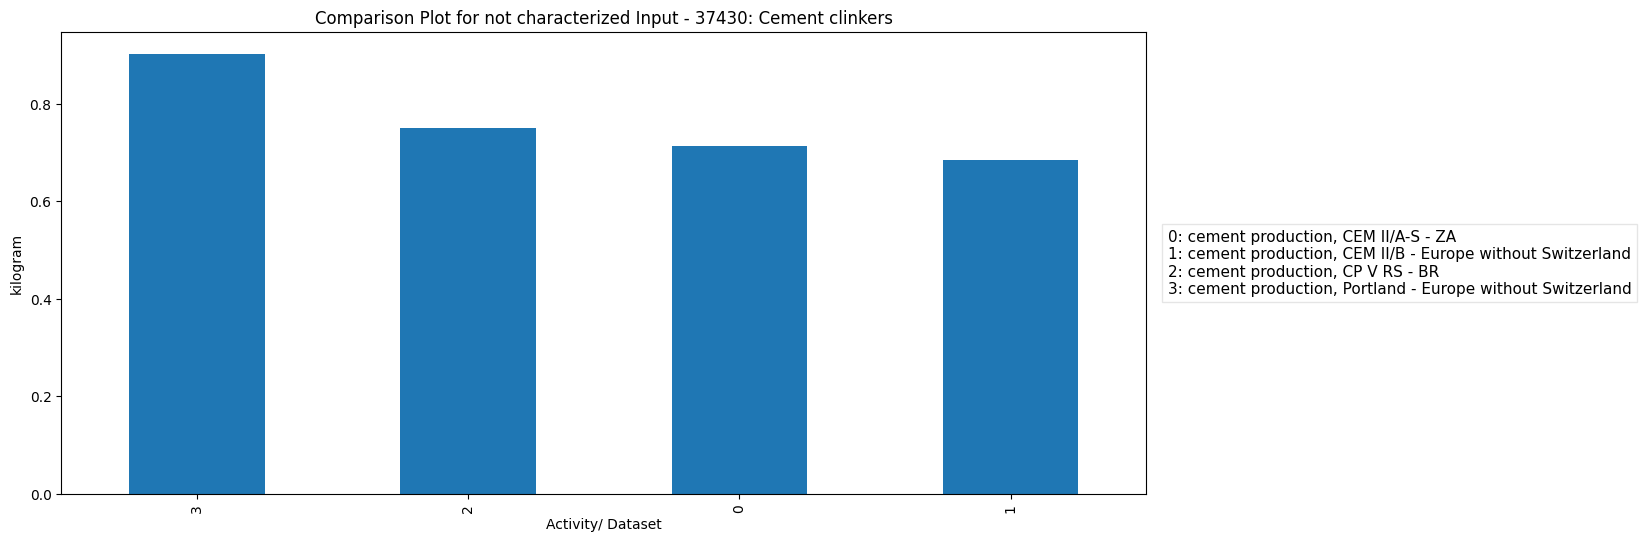

In [26]:
lvl23_plot_input_comparison_plot_no_method(sector_cement_small, input_type='list', input_number='37430')

3.4. Level 3 S-curve

*Need to generate a set of activities from the ecoinvent database which matches that of the premise based database. A small selection of cement datasets is made, to reduce runtime*

*TBD: Need to include treatment of activities which are only present in premise but not in ecoinvent*

In [27]:
set_cement_concrete_ei39=generate_sets_from_filters(fp_yaml, database=ei39)

In [33]:
small_set_cement_ei39=[x for x in set_cement_concrete_ei39['Cement'] if 'Portland' in str(x)]

In [32]:
small_set_cement_ei39SSP2=[x for x in set_cement_concrete['Cement'] if 'Portland' in str(x)]

method: ('EN15804', 'inventory indicators ISO21930', 'Cumulative Energy Demand - non-renewable energy resources')
('cement production, Portland', 'kilogram', 'ZA', 'cement, Portland'): -0.34934446974007033
('cement production, Portland', 'kilogram', 'Europe without Switzerland', 'cement, Portland'): -0.20608780648274835
('cement production, Pozzolana Portland', 'kilogram', 'IN', 'cement, Pozzolana Portland'): -0.25952148057218843
('cement production, Portland', 'kilogram', 'BR', 'cement, Portland'): -0.05189055484939185
('cement production, Portland', 'kilogram', 'US', 'cement, Portland'): -0.25736953077710994
('cement production, Portland', 'kilogram', 'CA-QC', 'cement, Portland'): 0.0011289636388264429
('cement production, Portland', 'kilogram', 'PE', 'cement, Portland'): -0.0804718407851663
('cement production, Portland', 'kilogram', 'IN', 'cement, Portland'): -0.25164372778778993
('cement production, Portland Slag', 'kilogram', 'IN', 'cement, Portland Slag'): -0.31517898241979864
(

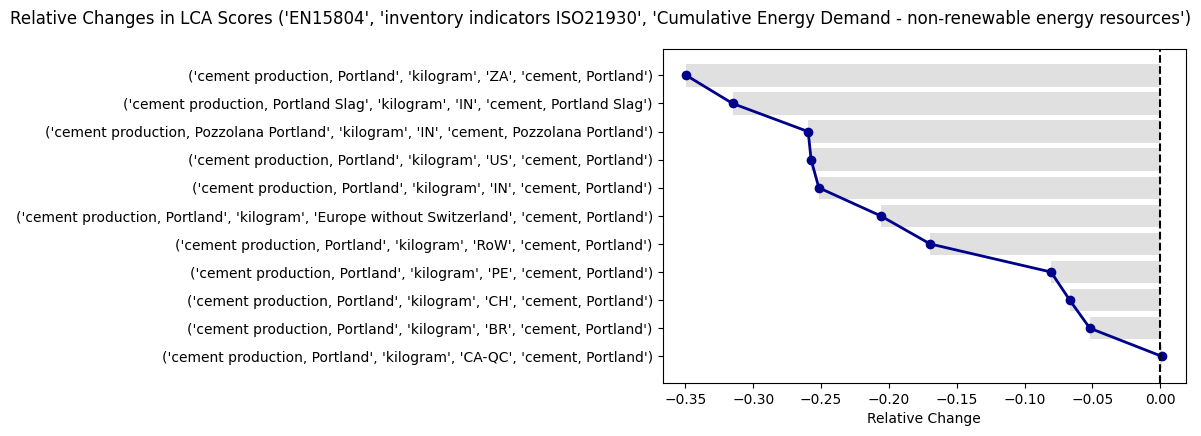

In [30]:
lvl3_plot_relative_changes(small_set_cement_ei39, small_set_cement_ei39SSP2, method=meth_list[1].name)

*TBD: 1. Test with other sectors, larger activity lists. 2. Check water use results*